# ***Intoduction to Computer Vision [Week1]***

In [ ]:
# Install this package to use Colab's GPU for training
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 420 MB of archives.
After this operation, 3,369 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.4.1.50-1+cuda11.6 [420 MB]
Fetched 420 MB in 8s (50.7 MB/s)
(Reading database ... 157604 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 157582 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.4.1.50-1+cuda11.6_amd64.deb ...
Unpacking libcudnn8 (8.4.1.50-1+c

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-09-24 11:43:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   185MB/s    in 0.4s    

2022-09-24 11:43:38 (185 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

zip_ref = "./cats_and_dogs_filtered.zip"
zipfileObj = zipfile.ZipFile(zip_ref, 'r')
zipfileObj.extractall()
zipfileObj.close()

In [ ]:
import os
base_dir = "./cats_and_dogs_filtered"
print(f"items of base dir--->{os.listdir(base_dir)}")
train_dir = base_dir+"/train"
print(f"items of train dir--->{os.listdir(train_dir)}")
train_cat_dir = train_dir+"/cats"
print(f"items of train_cat_dir--->{os.listdir(train_cat_dir)}")
train_dog_dir = train_dir+"/dogs"
print(f"items of train_dog_dir--->{os.listdir(train_dog_dir)}")
validation_dir = base_dir+"/validation"
print(f"items of validation dir--->{os.listdir(train_dir)}")
validation_cat_dir = validation_dir+"/cats"
print(f"items of validation_cat_dir--->{os.listdir(validation_cat_dir)}")
validation_dog_dir = validation_dir+"/dogs"
print(f"items of validation_dog_dir--->{os.listdir(validation_dog_dir)}")


items of base dir--->['vectorize.py', 'train', 'validation']
items of train dir--->['dogs', 'cats']
items of train_cat_dir--->['cat.382.jpg', 'cat.841.jpg', 'cat.492.jpg', 'cat.763.jpg', 'cat.554.jpg', 'cat.908.jpg', 'cat.821.jpg', 'cat.591.jpg', 'cat.387.jpg', 'cat.631.jpg', 'cat.101.jpg', 'cat.603.jpg', 'cat.423.jpg', 'cat.948.jpg', 'cat.559.jpg', 'cat.246.jpg', 'cat.333.jpg', 'cat.144.jpg', 'cat.332.jpg', 'cat.885.jpg', 'cat.777.jpg', 'cat.911.jpg', 'cat.485.jpg', 'cat.875.jpg', 'cat.801.jpg', 'cat.14.jpg', 'cat.704.jpg', 'cat.49.jpg', 'cat.645.jpg', 'cat.711.jpg', 'cat.412.jpg', 'cat.656.jpg', 'cat.918.jpg', 'cat.359.jpg', 'cat.279.jpg', 'cat.514.jpg', 'cat.551.jpg', 'cat.610.jpg', 'cat.102.jpg', 'cat.690.jpg', 'cat.697.jpg', 'cat.665.jpg', 'cat.957.jpg', 'cat.128.jpg', 'cat.156.jpg', 'cat.72.jpg', 'cat.584.jpg', 'cat.667.jpg', 'cat.954.jpg', 'cat.607.jpg', 'cat.448.jpg', 'cat.823.jpg', 'cat.295.jpg', 'cat.768.jpg', 'cat.829.jpg', 'cat.97.jpg', 'cat.462.jpg', 'cat.269.jpg', 'cat.72

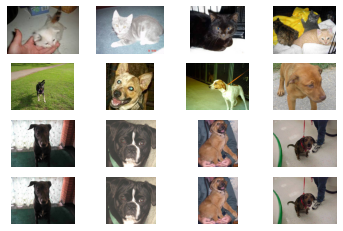

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4,4
picIndex = 4

train_cat_image = os.listdir(train_cat_dir)
train_dog_image = os.listdir(train_dog_dir)
validation_cat_image = os.listdir(validation_cat_dir)
validation_dogs_image = os.listdir(validation_dog_dir)
catTrainimgae = [os.path.join(train_cat_dir,fname) for fname in train_cat_image[picIndex-4:picIndex]]
dogTrainimgae = [os.path.join(train_dog_dir,fname) for fname in train_dog_image[picIndex-4:picIndex]]
catValidationimgae = [os.path.join(validation_cat_dir,fname) for fname in validation_cat_image[picIndex-4:picIndex]]
catValidationimgae = [os.path.join(validation_dog_dir,fname) for fname in validation_dogs_image[picIndex-4:picIndex]]

for idx, fname in enumerate(catTrainimgae+dogTrainimgae+catValidationimgae+catValidationimgae):
    subplot = plt.subplot(ncols, nrows, idx+1)
    subplot.axis("off")
    fname = mpimg.imread(fname)
    plt.imshow(fname)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model(input_shape):
    model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=input_shape),
                                        tf.keras.layers.MaxPooling2D((2,2)),
                                        tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                        tf.keras.layers.MaxPooling2D((2,2)),
                                        tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                        tf.keras.layers.MaxPooling2D((2,2)),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1024, activation='relu'),
                                        tf.keras.layers.Dense(1, activation='sigmoid')])

    model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics = ["accuracy"])
    model.summary()
    return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1./255)
Valid_gen = ImageDataGenerator(rescale=1./255)

train_images = train_gen.flow_from_directory(train_dir, target_size = (150,150), batch_size = 20, class_mode="binary")
valid_images = train_gen.flow_from_directory(validation_dir, target_size = (150,150), batch_size = 20, class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = create_model(input_shape=(150,150,3))
history = model.fit(train_images, epochs = 10, validation_data = valid_images, verbose=2)

Epoch 1/10
100/100 - 74s - loss: 0.8386 - accuracy: 0.5965 - val_loss: 0.8261 - val_accuracy: 0.5200 - 74s/epoch - 738ms/step
Epoch 2/10
100/100 - 71s - loss: 0.6224 - accuracy: 0.6840 - val_loss: 0.6656 - val_accuracy: 0.6130 - 71s/epoch - 708ms/step
Epoch 3/10
100/100 - 70s - loss: 0.5570 - accuracy: 0.7110 - val_loss: 0.5730 - val_accuracy: 0.7010 - 70s/epoch - 695ms/step
Epoch 4/10
100/100 - 71s - loss: 0.4688 - accuracy: 0.7790 - val_loss: 0.5828 - val_accuracy: 0.7040 - 71s/epoch - 707ms/step
Epoch 5/10
100/100 - 72s - loss: 0.3808 - accuracy: 0.8295 - val_loss: 0.6725 - val_accuracy: 0.6940 - 72s/epoch - 718ms/step
Epoch 6/10
100/100 - 70s - loss: 0.3120 - accuracy: 0.8595 - val_loss: 0.8289 - val_accuracy: 0.6840 - 70s/epoch - 704ms/step
Epoch 7/10
100/100 - 71s - loss: 0.2401 - accuracy: 0.8985 - val_loss: 0.7391 - val_accuracy: 0.7290 - 71s/epoch - 712ms/step
Epoch 8/10
100/100 - 69s - loss: 0.1591 - accuracy: 0.9425 - val_loss: 0.8183 - val_accuracy: 0.7420 - 69s/epoch - 693

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

def check_uploaded_photos():
    uploaded = files.upload()

    for key in uploaded.keys():
        path = '/content/'+key
        img=image.load_img(path, target_size=(150, 150))
        x = image.img_to_array(img)
        x /=255
        x = np.expand_dims(x, axis=0)
        img = np.vstack([x])
        prediction = model.predict(img, batch_size=10)
        # print(key)
        print(f"model prediction for {key} is {prediction}")
        # if prediction[0]>0.5:
        #   print(f"its a cat with prediction--->{prediction[0]}")
        # else:
        #   print(f"its a dog with prediction--->{prediction[1]}")


In [ ]:
check_uploaded_photos()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


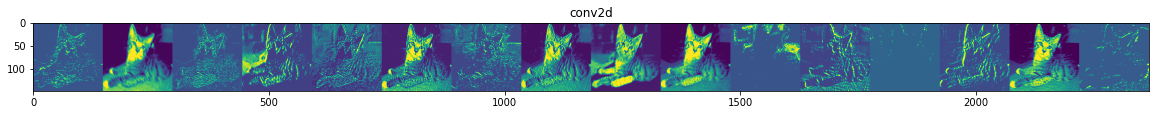

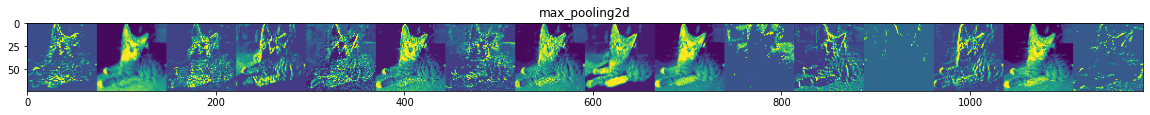

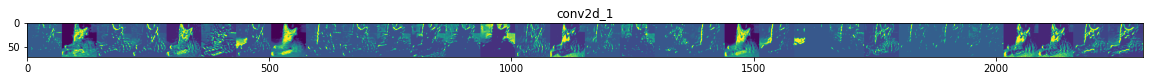

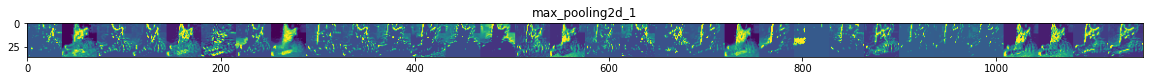

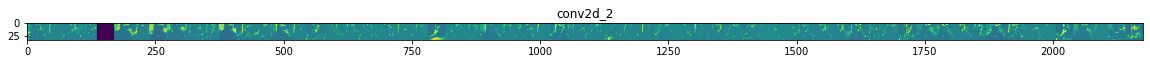

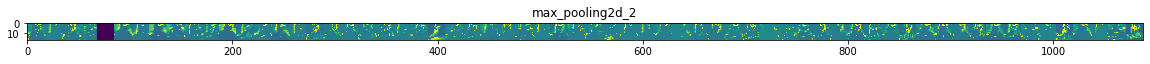

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cat_dir, f) for f in train_cat_image]
dog_img_files = [os.path.join(train_dog_dir, f) for f in train_dog_image]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 


In [ ]:
def plt_loss_acc(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'b', label = "training_accuracy")
    plt.plot(epochs, val_acc, 'r', label = "validation_accuracy")
    plt.title("training and validation accuracy")
    plt.legend()
    plt.figure()


    plt.plot(epochs, loss, 'b', label = "training_loss")
    plt.plot(epochs, val_loss, 'r', label = "validation_loss")
    plt.title("training and validation loss")
    plt.legend()

    plt.show()

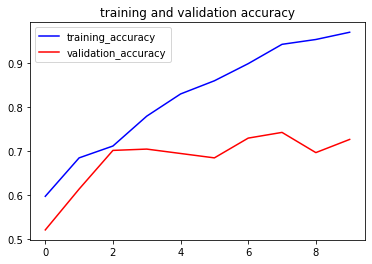

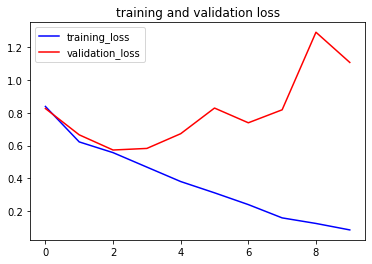

In [ ]:
plt_loss_acc(history)

# **Data Augumentation to Improve model performance along with avoid the overfitting problem [Week 2]**

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

Valid_gen = ImageDataGenerator(rescale=1./255)

training_images = train_gen.flow_from_directory(train_dir, batch_size=20, target_size = (150,150),class_mode='binary')

vaildation_images_images = Valid_gen.flow_from_directory(validation_dir, batch_size=20, target_size = (150,150),class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = create_model(input_shape=(150,150,3))
history = model.fit(training_images, steps_per_epoch = 100, epochs=15, validation_data=vaildation_images_images, validation_steps=50, verbose=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

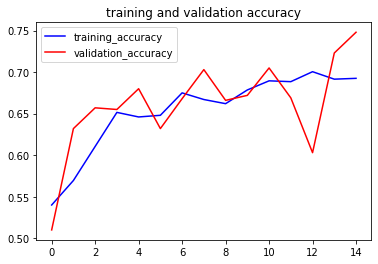

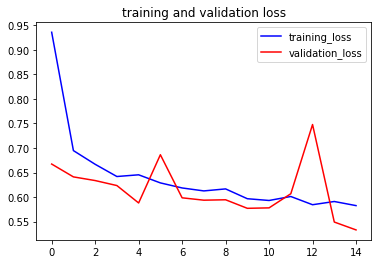

In [ ]:
plt_loss_acc(history)

# ***Re-Training Horse vs Human model along with data augumentation [Week2]***

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip


--2022-09-24 12:41:10--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.210.128, 173.194.211.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   138MB/s    in 1.0s    

2022-09-24 12:41:11 (138 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip


--2022-09-24 12:41:18--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.210.128, 173.194.211.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.07s   

2022-09-24 12:41:19 (154 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import os
import zipfile

train_zip_file = "./horse-or-human.zip"
train_ref = zipfile.ZipFile(train_zip_file)
train_ref.extractall("./horse-or-human")
val_zip_file = "validation-horse-or-human.zip"
val_ref = zipfile.ZipFile(val_zip_file)
val_ref.extractall("validation-horse-or-human")
train_ref.close()
val_ref.close()

In [ ]:
train_dir = "./horse-or-human"
val_dir = "./validation-horse-or-human"

train_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")
val_gen = ImageDataGenerator(rescale=1./255)

train_images = train_gen.flow_from_directory(train_dir, batch_size=20, target_size=(300,300),class_mode='binary')
val_images = val_gen.flow_from_directory(val_dir, batch_size=20, target_size=(300,300),class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
model = create_model(input_shape=(300,300,3))
history = model.fit(train_images, steps_per_epoch=8, epochs=20, validation_data=val_images, validation_steps=8, verbose=1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 35, 35, 64)      

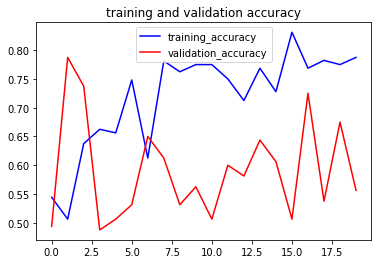

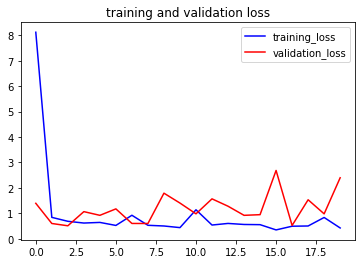

In [ ]:
plt_loss_acc(history)

# ***Transfer Learning [Week 3]***

In [ ]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-09-24 16:19:26--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   148MB/s    in 0.6s    

2022-09-24 16:19:26 (148 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3

preTrained_weights = "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

preTrained_model = InceptionV3(input_shape=(150,150,3), include_top=False, weights=None)

preTrained_model.load_weights(preTrained_weights)

for layer in preTrained_model.layers:
  layer.trainable=False

In [ ]:
preTrained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
last_layer = preTrained_model.get_layer("mixed7")
last_output = last_layer.output
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = Model(preTrained_model.input, x )
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                              

In [ ]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001))

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2022-09-24 16:32:45--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  21.2MB/s    in 3.1s    

2022-09-24 16:32:48 (21.2 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile
import os

zip_file = "./cats_and_dogs_filtered.zip"
zip_ref = zipfile.ZipFile(zip_file)
zip_ref.extractall()
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
root_dir = "./cats_and_dogs_filtered"
train_dir = os.path.join(root_dir, "train")
val_dir = os.path.join(root_dir, "validation")
train_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip = True, shear_range=0.2, zoom_range=0.2, fill_mode="nearest")
val_gen = ImageDataGenerator(rescale=1./255)
train_images = train_gen.flow_from_directory(train_dir, batch_size = 20, target_size = (150,150), class_mode="binary")
valid_images = val_gen.flow_from_directory(val_dir, batch_size = 20, target_size = (150,150), class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_images, steps_per_epoch=100, epochs=20, validation_data=valid_images, validation_steps=50, verbose=1)

Epoch 1/20
100/100 [==============================] - 227s 2s/step - loss: 1.1179 - accuracy: 0.8335 - val_loss: 0.1646 - val_accuracy: 0.9470
Epoch 2/20
100/100 [==============================] - 154s 2s/step - loss: 0.3627 - accuracy: 0.8880 - val_loss: 0.2525 - val_accuracy: 0.9340
Epoch 3/20
100/100 [==============================] - 153s 2s/step - loss: 0.3619 - accuracy: 0.8950 - val_loss: 0.1236 - val_accuracy: 0.9610
Epoch 4/20
100/100 [==============================] - 153s 2s/step - loss: 0.3199 - accuracy: 0.9070 - val_loss: 0.1574 - val_accuracy: 0.9560
Epoch 5/20
100/100 [==============================] - 153s 2s/step - loss: 0.2573 - accuracy: 0.9175 - val_loss: 0.1438 - val_accuracy: 0.9580
Epoch 6/20
100/100 [==============================] - 153s 2s/step - loss: 0.2640 - accuracy: 0.9200 - val_loss: 0.1068 - val_accuracy: 0.9680
Epoch 7/20
100/100 [==============================] - 153s 2s/step - loss: 0.2686 - accuracy: 0.9195 - val_loss: 0.1239 - val_accuracy: 0.9630

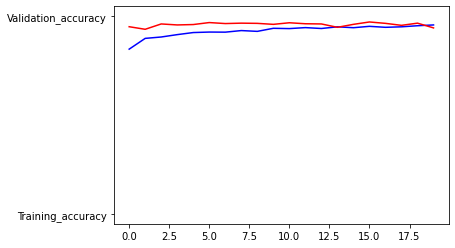

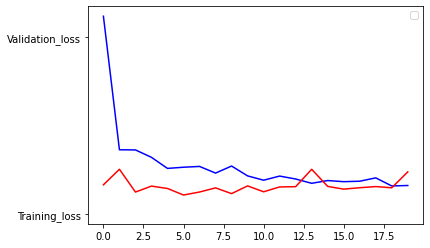

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', "Training_accuracy")
plt.plot(epochs, val_acc, 'r', "Validation_accuracy")
# plt.legend()
plt.figure()


plt.plot(epochs, loss, 'b', "Training_loss")
plt.plot(epochs, val_loss, 'r', "Validation_loss")
plt.legend()
# plt.figure()
plt.show()

# ***Multi-Class Classification [Week 4]***

In [ ]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2022-09-24 17:52:16--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   149MB/s    in 1.3s    

2022-09-24 17:52:17 (149 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2022-09-24 17:52:17--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-

In [ ]:
import os
import zipfile

zip_local = "./rps.zip"
zip_ref = zipfile.ZipFile(zip_local)
zip_ref.extractall("./rps_train")
zip_ref.close()

zip_local = "./rps-test-set.zip"
zip_ref = zipfile.ZipFile(zip_local)
zip_ref.extractall("./rps_valid")
zip_ref.close()

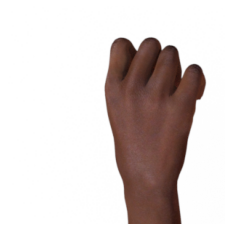

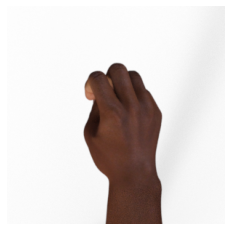

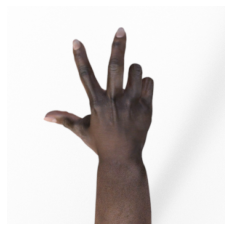

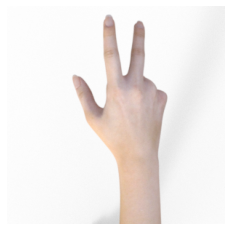

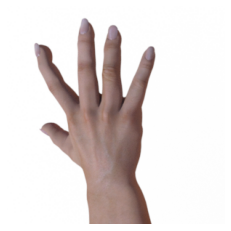

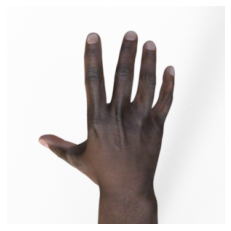

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
train_dir = "./rps_train/rps"
val_dir = "./rps_valid/rps-test-set"

rock_dir = os.path.join(train_dir,"rock")
paper_dir = os.path.join(train_dir,"paper")
scissor_dir = os.path.join(train_dir,"scissors")

picIndex = 2

rock_images = [os.path.join(rock_dir,fname) for fname in os.listdir(rock_dir)[picIndex-2:picIndex]]
paper_images = [os.path.join(paper_dir,fname) for fname in os.listdir(paper_dir)[picIndex-2:picIndex]]
scissor_images = [os.path.join(scissor_dir,fname) for fname in os.listdir(scissor_dir)[picIndex-2:picIndex]]

for idx, fname in enumerate(rock_images+scissor_images+paper_images):
  img = mpimg.imread(fname)
  plt.axis("off")
  plt.grid(False)
  plt.imshow(img)
  plt.show()


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation='relu'),
                                    tf.keras.layers.Dense(3,activation="softmax")])

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
val_gen = ImageDataGenerator(rescale=1./255)

train_samples = train_gen.flow_from_directory(train_dir, batch_size=126, target_size=(150,150),class_mode="categorical")
val_samples = train_gen.flow_from_directory(val_dir, batch_size=126, target_size=(150,150),class_mode="categorical")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
history = model.fit(train_samples, epochs=25, steps_per_epoch=20, validation_data=val_samples, verbose=2, validation_steps=3)


Epoch 1/25
20/20 - 90s - loss: 1.0845 - accuracy: 0.4048 - val_loss: 1.1772 - val_accuracy: 0.3333 - 90s/epoch - 4s/step
Epoch 2/25
20/20 - 92s - loss: 0.9941 - accuracy: 0.5135 - val_loss: 0.9964 - val_accuracy: 0.5565 - 92s/epoch - 5s/step
Epoch 3/25
20/20 - 80s - loss: 0.8736 - accuracy: 0.6020 - val_loss: 0.7788 - val_accuracy: 0.5941 - 80s/epoch - 4s/step
Epoch 4/25
20/20 - 76s - loss: 0.7421 - accuracy: 0.6464 - val_loss: 0.7895 - val_accuracy: 0.6022 - 76s/epoch - 4s/step
Epoch 5/25
20/20 - 76s - loss: 0.5991 - accuracy: 0.7373 - val_loss: 0.4872 - val_accuracy: 0.7554 - 76s/epoch - 4s/step
Epoch 6/25
20/20 - 76s - loss: 0.4538 - accuracy: 0.8040 - val_loss: 1.2025 - val_accuracy: 0.6129 - 76s/epoch - 4s/step
Epoch 7/25
20/20 - 76s - loss: 0.5133 - accuracy: 0.8083 - val_loss: 0.3670 - val_accuracy: 0.8737 - 76s/epoch - 4s/step
Epoch 8/25
20/20 - 76s - loss: 0.4081 - accuracy: 0.8393 - val_loss: 0.5697 - val_accuracy: 0.8360 - 76s/epoch - 4s/step
Epoch 9/25
20/20 - 76s - loss: 0

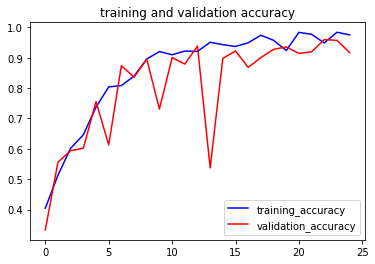

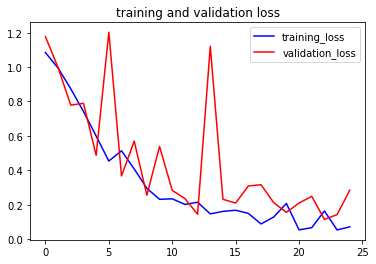

In [ ]:
plt_loss_acc(history)

In [ ]:
check_uploaded_photos()

Saving paper-hires1.png to paper-hires1.png
Saving paper-hires2.png to paper-hires2.png
Saving paper1.png to paper1.png
Saving paper2.png to paper2 (1).png
Saving paper3.png to paper3.png
Saving paper4.png to paper4 (1).png
Saving paper5.png to paper5.png
Saving paper6.png to paper6.png
Saving paper7.png to paper7.png
Saving paper8.png to paper8.png
Saving paper9.png to paper9.png
Saving rock-hires1.png to rock-hires1.png
Saving rock-hires2.png to rock-hires2.png
Saving rock1.png to rock1.png
Saving rock2.png to rock2.png
Saving rock3.png to rock3.png
Saving rock4.png to rock4.png
Saving rock5.png to rock5.png
Saving rock6.png to rock6.png
Saving rock7.png to rock7.png
Saving rock8.png to rock8.png
Saving rock9.png to rock9.png
Saving scissors-hires1.png to scissors-hires1.png
Saving scissors-hires2.png to scissors-hires2.png
Saving scissors1.png to scissors1.png
Saving scissors2.png to scissors2.png
Saving scissors3.png to scissors3.png
Saving scissors4.png to scissors4.png
Saving sci